In [35]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [36]:
file_to_load = "NFL_OHE_df.csv"
Linear_df = pd.read_csv(file_to_load)
Linear_df

,Unnamed: 0,Age,Year,BaseSalary,SigningBonus,Cap Hit,Salary%,Wins,Losses,Ties,...,Division_AFC South,Division_AFC West,Division_NFC East,Division_NFC North,Division_NFC South,Division_NFC West,Playoff_No,Playoff_Yes,Won Superbowl_No,Won Superbowl_Yes
0,0,25,2011,14225000,0,17228125,0.134,8,8,0,...,0,0,0,0,0,0,1,0,1,0
1,1,31,2011,11420000,2500000,16420000,0.134,2,14,0,...,1,0,0,0,0,0,1,0,1,0
2,2,28,2011,2000000,5000000,16250000,0.133,8,8,0,...,0,0,0,0,0,1,1,0,1,0
3,3,26,2011,13800000,0,16200000,0.135,10,6,0,...,1,0,0,0,0,0,0,1,1,0
4,4,35,2011,3400000,4000000,16000000,0.130,2,14,0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21996,21996,25,2021,36666,0,36666,0.000,5,12,0,...,0,0,0,0,1,0,1,0,1,0
21997,21997,23,2021,36666,0,36666,0.000,4,13,0,...,1,0,0,0,0,0,1,0,1,0
21998,21998,23,2021,36666,0,36666,0.000,4,13,0,...,1,0,0,0,0,0,1,0,1,0
21999,21999,23,2021,36666,0,36666,0.000,4,13,0,...,0,0,0,0,0,0,1,0,1,0


In [37]:

Linear_df.rename(columns={"Cap Hit":"Cap_Hit"},inplace=True)
Linear_df

,Unnamed: 0,Age,Year,BaseSalary,SigningBonus,Cap_Hit,Salary%,Wins,Losses,Ties,...,Division_AFC South,Division_AFC West,Division_NFC East,Division_NFC North,Division_NFC South,Division_NFC West,Playoff_No,Playoff_Yes,Won Superbowl_No,Won Superbowl_Yes
0,0,25,2011,14225000,0,17228125,0.134,8,8,0,...,0,0,0,0,0,0,1,0,1,0
1,1,31,2011,11420000,2500000,16420000,0.134,2,14,0,...,1,0,0,0,0,0,1,0,1,0
2,2,28,2011,2000000,5000000,16250000,0.133,8,8,0,...,0,0,0,0,0,1,1,0,1,0
3,3,26,2011,13800000,0,16200000,0.135,10,6,0,...,1,0,0,0,0,0,0,1,1,0
4,4,35,2011,3400000,4000000,16000000,0.130,2,14,0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21996,21996,25,2021,36666,0,36666,0.000,5,12,0,...,0,0,0,0,1,0,1,0,1,0
21997,21997,23,2021,36666,0,36666,0.000,4,13,0,...,1,0,0,0,0,0,1,0,1,0
21998,21998,23,2021,36666,0,36666,0.000,4,13,0,...,1,0,0,0,0,0,1,0,1,0
21999,21999,23,2021,36666,0,36666,0.000,4,13,0,...,0,0,0,0,0,0,1,0,1,0


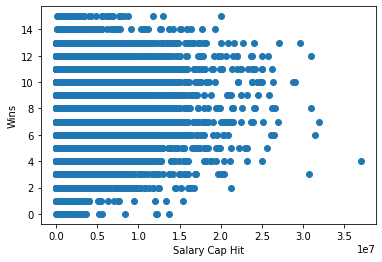

In [38]:
plt.scatter(Linear_df.Cap_Hit, Linear_df.Wins)
plt.xlabel('Salary Cap Hit')
plt.ylabel('Wins')
plt.show()

In [39]:
X = Linear_df.Cap_Hit.values.reshape(-1, 1)

In [40]:
X[:5]

array([[17228125],
       [16420000],
       [16250000],
       [16200000],
       [16000000]], dtype=int64)

In [41]:
X.shape

(22001, 1)

In [42]:
y=Linear_df.Wins


In [43]:
model = LinearRegression()

In [44]:
model.fit(X, y)

LinearRegression()

In [45]:
y_pred = model.predict(X)
print(y_pred.shape)

(22001,)


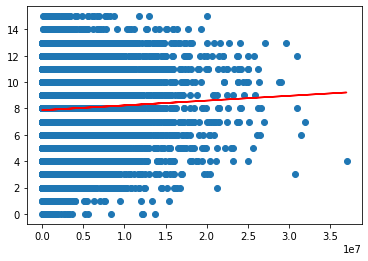

In [46]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [47]:
print(model.coef_)
print(model.intercept_)

[3.63792973e-08]
7.870574551558885


In [48]:
y.value_counts()

7     2992
8     2229
10    2206
9     2202
6     1910
11    1835
12    1776
4     1767
5     1704
13    1333
3      954
2      599
14     178
1      141
15     111
0       64
Name: Wins, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print("Train sample: ", Counter(y_train))
print("Test sample: ", Counter(y_test))

Train sample:  Counter({7: 2251, 9: 1664, 10: 1662, 8: 1655, 6: 1456, 11: 1349, 4: 1325, 12: 1313, 5: 1309, 13: 991, 3: 701, 2: 455, 14: 134, 1: 99, 15: 82, 0: 54})
Test sample:  Counter({7: 741, 8: 574, 10: 544, 9: 538, 11: 486, 12: 463, 6: 454, 4: 442, 5: 395, 13: 342, 3: 253, 2: 144, 14: 44, 1: 42, 15: 29, 0: 10})
